<a href="https://colab.research.google.com/github/HarshitRai121/Computer_Vision_IITD/blob/main/cv_assignment_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Import Libraries and Load Iris Dataset

In [5]:
import numpy as np
import pandas as pd
from sklearn import datasets
import matplotlib.pyplot as plt

# Load Iris dataset
iris = datasets.load_iris()
data = iris.data[:, :2]  # Using the first two features


###Define the KNN Class

In [6]:
class KNN:
    def __init__(self, k=3):
        self.k = k

    def fit(self, X_train, y_train):
        self.X_train = X_train
        self.y_train = y_train

    def predict(self, X_test):
        predictions = []

        for x in X_test:
            distances = np.linalg.norm(self.X_train - x, axis=1)
            k_nearest_indices = np.argsort(distances)[:self.k]
            k_nearest_labels = self.y_train[k_nearest_indices]
            prediction = np.argmax(np.bincount(k_nearest_labels))
            predictions.append(prediction)

        return np.array(predictions)


### Prepare Data and Train the Model for k=1

In [7]:
# Prepare data
X_train = data
y_train = iris.target

# Create a new instance of the KNN classifier for k=1
knn_classifier_k1 = KNN(k=1)

# Training the model
knn_classifier_k1.fit(X_train, y_train)


###Plot Decision Boundaries for k=1

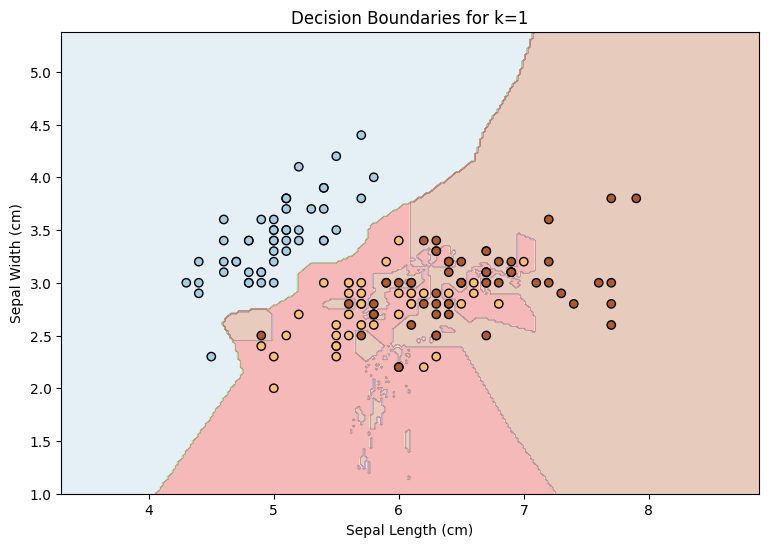

In [8]:
plt.figure(figsize=(9, 6))

# Plotting decision boundaries
h = 0.02
x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

Z_k1 = knn_classifier_k1.predict(np.c_[xx.ravel(), yy.ravel()])
Z_k1 = Z_k1.reshape(xx.shape)

plt.contourf(xx, yy, Z_k1, cmap=plt.cm.Paired, alpha=0.3)

# Scatter plot
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.title('Decision Boundaries for k=1')
plt.show()


###Train the Model for k=5

In [9]:
# Create a new instance of the KNN classifier for k=5
knn_classifier_k5 = KNN(k=5)

# Training the model
knn_classifier_k5.fit(X_train, y_train)


### Plot Decision Boundaries for k=5

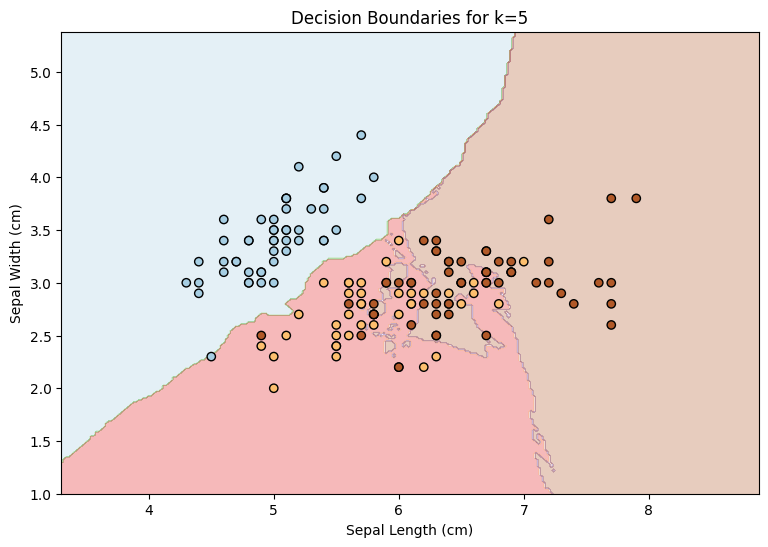

In [10]:
plt.figure(figsize=(9, 6))

# Plotting decision boundaries
Z_k5 = knn_classifier_k5.predict(np.c_[xx.ravel(), yy.ravel()])
Z_k5 = Z_k5.reshape(xx.shape)

plt.contourf(xx, yy, Z_k5, cmap=plt.cm.Paired, alpha=0.3)

# Scatter plot
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.title('Decision Boundaries for k=5')
plt.show()
